## Bootstrapping CI and Model Behaviour

In [3]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("ticks")

In [4]:
dfmod = pd.read_csv('data/aqi_data_mod.csv')
dfobs = pd.read_csv('data/aqi_data_obs.csv')

In [5]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [6]:
dfobs.isna().sum()

date                0
hour                0
obs_PM2.5          33
obs_PM2.5_stdev    52
obs_PM10           33
obs_PM10_stdev     52
dtype: int64

In [7]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [8]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [9]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [10]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [11]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [12]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,152.61,51.64,241.71,105.98,2020-11-01 00:00:00
2020-11-01 01:00:00,159.82,53.31,254.49,111.38,2020-11-01 01:00:00
2020-11-01 02:00:00,160.04,51.57,252.47,109.05,2020-11-01 02:00:00
2020-11-01 03:00:00,156.73,40.47,242.03,87.21,2020-11-01 03:00:00
2020-11-01 04:00:00,156.32,41.95,232.03,84.02,2020-11-01 04:00:00


In [13]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,387.90,158.73,561.44,165.77,2020-11-01 00:00:00
2020-11-01 01:00:00,348.11,143.39,486.04,159.66,2020-11-01 01:00:00
2020-11-01 02:00:00,326.03,120.39,516.67,134.42,2020-11-01 02:00:00
2020-11-01 03:00:00,302.90,111.29,514.41,125.31,2020-11-01 03:00:00
2020-11-01 04:00:00,309.05,104.38,520.55,102.16,2020-11-01 04:00:00


In [14]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

In [15]:
splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

In [16]:
dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

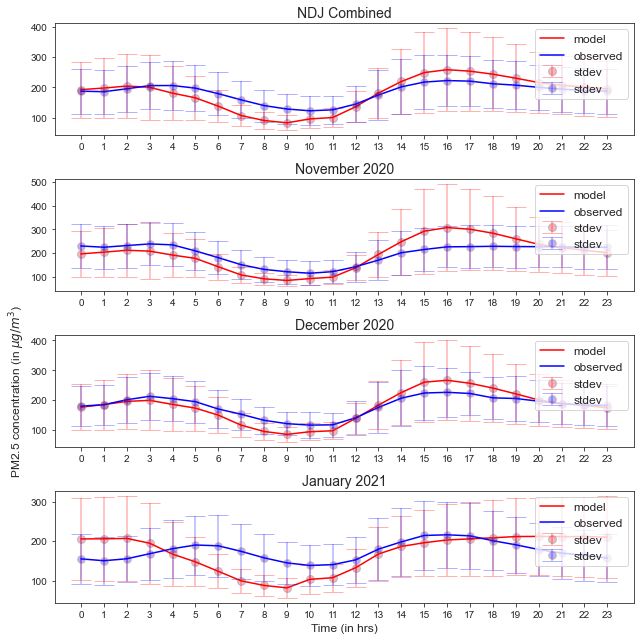

In [17]:
fig = plt.figure(figsize=(9,9))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
# plt.ylabel('PM2.5 concentration', fontsize=12)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=14)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
# plt.ylabel('PM2.5 concentration', fontsize=12)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=14)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=12)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=14)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
# plt.ylabel('PM2.5 concentration', fontsize=12)
plt.xlabel('Time (in hrs)', fontsize=12)
plt.title('January 2021', fontsize=14)

# fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png', dpi=300)

In [18]:
dfmod.rename(columns={
    "mod_PM10_stdev ":"mod_PM10_stdev",
}, inplace=True)

dfobs.rename(columns={
    "obs_PM10_stdev ":"obs_PM10_stdev"
}, inplace=True)

In [19]:
# df = pd.concat([dfmod, dfobs], axis = 1, join = "inner")
df = aqi_calc.get_aqi(dfmod, dfobs)

In [20]:
# df.drop('datetime', axis = 1, inplace = True)

In [21]:
df.tail()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2021-01-31 19:00:00,262.13,477.64,169.556250,94.367917,304.631250,181.144583,338.108756,254.631250,4,3,283.41,473.15,163.405000,70.887083,312.015000,130.423750,333.378445,262.015000,4,3
2021-01-31 20:00:00,280.50,515.65,171.562083,97.251250,308.490417,186.558750,339.651242,258.490417,4,3,258.25,404.22,166.218750,72.538750,314.311250,131.777500,335.542219,264.311250,4,3
2021-01-31 21:00:00,280.55,531.10,173.837083,98.862083,313.481667,190.334167,341.400717,263.481667,4,3,259.50,420.72,168.468750,73.830417,315.406250,129.229583,337.272469,265.406250,4,3
2021-01-31 22:00:00,317.31,602.42,178.011667,101.294583,322.102083,195.576667,344.610972,272.102083,4,3,279.51,433.31,171.528750,74.962083,319.125000,131.076667,339.625609,269.125000,4,3
2021-01-31 23:00:00,346.14,654.82,183.647083,105.107500,333.397917,202.817500,348.944607,283.397917,4,3,264.59,419.70,174.874583,75.262917,323.839583,131.555833,342.198555,273.839583,4,3


In [22]:
df.shape

(2185, 20)

In [23]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

dfnov.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 23:00:00,90.07,181.35,127.504583,59.183333,219.647500,118.243750,305.771025,178.967350,4,2,159.32,270.60,179.448750,66.654167,335.294375,99.067708,345.716089,285.294375,4,3
2020-11-02 00:00:00,91.95,186.83,124.977083,59.065833,217.360833,118.301250,303.827377,177.458150,4,2,139.33,244.12,169.091667,63.607917,322.072708,97.627292,337.751492,272.072708,4,3
2020-11-02 01:00:00,102.19,208.51,122.575833,59.254167,215.445000,118.876667,301.980816,176.193700,4,2,116.35,226.64,159.435000,60.396667,311.264375,95.753542,330.325515,261.264375,4,3
2020-11-02 02:00:00,104.84,214.72,120.275833,59.528750,213.872083,119.806250,300.212116,175.155575,4,2,113.74,254.27,150.589583,58.083333,300.331042,95.091875,323.523390,250.331042,4,3
2020-11-02 03:00:00,99.08,200.06,117.873750,60.251250,212.123333,121.276667,292.819588,174.001400,3,2,129.55,304.04,143.366667,56.084167,291.565625,95.260208,317.968967,241.565625,4,3


In [24]:
dfdec.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-12-01 00:00:00,217.43,371.92,193.779167,104.885417,350.175417,206.209167,356.736179,300.219271,4,4,217.15,333.08,181.326667,65.266250,329.733333,109.444167,347.160207,279.733333,4,3
2020-12-01 01:00:00,225.81,388.71,195.393333,103.965417,351.401667,203.823333,357.977473,301.752083,4,4,214.55,338.96,183.100000,66.445417,332.511250,110.316250,348.523900,282.511250,4,3
2020-12-01 02:00:00,236.69,410.32,196.979167,103.090417,352.663333,201.576250,359.196979,303.329167,4,4,219.79,373.78,185.722500,67.695417,336.690000,111.310417,350.540602,286.690000,4,3
2020-12-01 03:00:00,246.51,433.27,198.519167,102.902917,353.826667,200.399583,360.381239,304.783333,4,4,252.21,394.66,188.428750,67.970417,339.427917,110.516250,352.621709,289.427917,4,3
2020-12-01 04:00:00,243.18,427.69,200.080417,102.533750,355.133750,199.099583,361.581840,306.417187,4,4,244.63,419.27,191.541250,68.425833,344.062500,109.759583,355.015221,294.062500,4,3


In [25]:
# from sklearn.utils import resample

# def bstrap(data, percentiles=(2.5, 97.5), n_boots=1000):
#     """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
#     # Create empty array to fill the results
# #     bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    
#     mod_pm2 = 'mod_PM2.5'
#     obs_pm2 = 'obs_PM2.5'
#     mod_pm10 = 'mod_PM10'
#     obs_pm10 = 'obs_PM10'
    
#     fb25 = []
#     fb10 = []
##     nmse25 = []
##     nmse10 = []
    
#     for ii in range(n_boots):
#         # Generate random indices for data *with* replacement, then take the sample mean
#         random_sample = resample(data)
# #         bootstrap_means[ii] = random_sample.mean(axis=0)

#         fb_pm25 = 2 * ((random_sample[mod_pm2].describe()[1] - random_sample[obs_pm2].describe()[1]) /
#                        (random_sample[mod_pm2].describe()[1] + random_sample[obs_pm2].describe()[1]))
#         fb_pm10 = 2 * ((random_sample[mod_pm10].describe()[1] - random_sample[obs_pm10].describe()[1]) /
#                        (random_sample[mod_pm10].describe()[1] + random_sample[obs_pm10].describe()[1]))
        
##         nmse_pm25 = (((random_sample[mod_pm2] - random_sample[obs_pm2]) * (random_sample[mod_pm2] - random_sample[obs_pm2])).describe()[1]) \
##                 / (random_sample[obs_pm2].describe()[1] * random_sample[mod_pm2].describe()[1])

##         nmse_pm10 = (((random_sample[mod_pm10] - random_sample[obs_pm10]) * (random_sample[mod_pm10] - random_sample[obs_pm10])).describe()[1]) \
##                 / (random_sample[obs_pm10].describe()[1] * random_sample[mod_pm10].describe()[1])
        
#         fb25.append(fb_pm25)
#         fb10.append(fb_pm10)
##         nmse25.append(nmse_pm25)
##         nmse10.append(nmse_pm10)

#     # Compute the percentiles of choice for the bootstrapped means
#     percentiles_fb25 = np.percentile(fb25, (5,95), axis=0)
#     percentiles_fb10 = np.percentile(fb10, (5,95), axis=0)
# #     percentiles_nmse25 = np.percentile(nmse25, (5,95), axis=0)
# #     percentiles_nmse10 = np.percentile(nmse10, (5,95), axis=0)
#     return percentiles_fb25, percentiles_fb10
# #     return fb25,fb10,nmse25,nmse10

In [26]:
from sklearn.utils import resample

def bstrap(data, percentiles=(2.5, 97.5), n_boots=1000):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create empty array to fill the results
#     bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    
#     mod_pm2 = 'mod_pm2'
#     obs_pm2 = 'obs_pm2'
#     mod_pm10 = 'mod_pm10'
#     obs_pm10 = 'obs_pm10'
    
    fb25 = []
    fb10 = []
    fbaqi25 = []
    fbaqi10 = []
#     nmse25 = []
#     nmse10 = []
    
    for ii in range(n_boots):
        # Generate random indices for data *with* replacement, then take the sample mean
        random_sample = resample(data)
#         bootstrap_means[ii] = random_sample.mean(axis=0)

#         fb_pm25 = 2 * ((random_sample[mod_pm2].describe()[1] - random_sample[obs_pm2].describe()[1]) /
#                        (random_sample[mod_pm2].describe()[1] + random_sample[obs_pm2].describe()[1]))
#         fb_pm10 = 2 * ((random_sample[mod_pm10].describe()[1] - random_sample[obs_pm10].describe()[1]) /
#                        (random_sample[mod_pm10].describe()[1] + random_sample[obs_pm10].describe()[1]))
        fb_aqi25 = 2 * ((random_sample['mod_aqi_pm2'].describe()[1] - random_sample['obs_aqi_pm2'].describe()[1]) /
                            (random_sample['mod_aqi_pm2'].describe()[1] + random_sample['obs_aqi_pm2'].describe()[1]))
        fb_aqi10 = 2 * ((random_sample['mod_aqi_pm10'].describe()[1] - random_sample['obs_aqi_pm10'].describe()[1]) /
                        (random_sample['mod_aqi_pm10'].describe()[1] + random_sample['obs_aqi_pm10'].describe()[1]))
 
 
        
#         nmse_pm25 = (((random_sample[mod_pm2] - random_sample[obs_pm2]) * (random_sample[mod_pm2] - random_sample[obs_pm2])).describe()[1]) \
#                 / (random_sample[obs_pm2].describe()[1] * random_sample[mod_pm2].describe()[1])

#         nmse_pm10 = (((random_sample[mod_pm10] - random_sample[obs_pm10]) * (random_sample[mod_pm10] - random_sample[obs_pm10])).describe()[1]) \
#                 / (random_sample[obs_pm10].describe()[1] * random_sample[mod_pm10].describe()[1])
        
#         nmse_aqi25 = (((random_sample['mod_aqi_pm2'] - random_sample['obs_aqi_pm2']) * (random_sample['mod_aqi_pm2'] - random_sample['obs_aqi_pm2'])).describe()[1]) \
#                     / (random_sample['obs_aqi_pm2'].describe()[1] * random_sample['mod_aqi_pm2'].describe()[1])
        
#         nmse_aqi10 = (((random_sample['mod_aqi_pm10'] - random_sample['obs_aqi_pm10']) * (random_sample['mod_aqi_pm10'] - random_sample['obs_aqi_pm10'])).describe()[1]) \
#                 / (random_sample['obs_aqi_pm10'].describe()[1] * random_sample['mod_aqi_pm10'].describe()[1])

        
#         fb25.append(fb_pm25)
#         fb10.append(fb_pm10)
        fbaqi25.append(fb_aqi25)
        fbaqi10.append(fb_aqi10)
#         nmse25.append(nmse_pm25)
#         nmse10.append(nmse_pm10)

    # Compute the percentiles of choice for the bootstrapped means
#     percentiles_fb25 = np.percentile(fb25, (5,95), axis=0)
#     percentiles_fb10 = np.percentile(fb10, (5,95), axis=0)
    percentiles_fbaqi25 = np.percentile(fbaqi25, (5,95), axis=0)
    percentiles_fbaqi10 = np.percentile(fbaqi10, (5,95), axis=0)
#     percentiles_nmse25 = np.percentile(nmse25, (5,95), axis=0)
#     percentiles_nmse10 = np.percentile(nmse10, (5,95), axis=0)
    return percentiles_fbaqi25, percentiles_fbaqi10
#     return fb25,fb10,nmse25,nmse10

In [27]:
percentiles_fbaqi25nov, percentiles_fbaqi10nov = bstrap(dfnov)
percentiles_fbaqi25dec, percentiles_fbaqi10dec = bstrap(dfdec)
percentiles_fbaqi25jan, percentiles_fbaqi10jan = bstrap(dfjan)
percentiles_fbaqi25, percentiles_fbaqi10 = bstrap(df)

### November

In [28]:
print("The vals are for November - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB AQI 25:", percentiles_fbaqi25nov)
print("FB AQI 10:", percentiles_fbaqi10nov)

The vals are for November - 
FB AQI 25: [0.03475078 0.06122875]
FB AQI 10: [-0.0153129   0.01702619]


In [29]:
lower_25nov, upper_25nov = 0.0472 - percentiles_fbaqi25nov[0], percentiles_fbaqi25nov[1] - 0.0472

error_25nov = np.array([[lower_25nov, upper_25nov]]).T
print(error_25nov)

[[0.01244922]
 [0.01402875]]


In [30]:
lower_10nov, upper_10nov = 0.00139 - percentiles_fbaqi10nov[0], percentiles_fbaqi10nov[1] - 0.00139

error_10nov = np.array([[lower_10nov, upper_10nov]]).T
print(error_10nov)

[[0.0167029 ]
 [0.01563619]]


### December

In [31]:
print("The vals are for December - ")

# print("FB 25:", percentiles_fb25dec)
# print("FB 10:", percentiles_fb10dec)
print("FB AQI 25:", percentiles_fbaqi25dec)
print("FB AQI 10:", percentiles_fbaqi10dec)

The vals are for December - 
FB AQI 25: [-0.00620909  0.01121703]
FB AQI 10: [0.00490908 0.04397013]


In [32]:
lower_25dec, upper_25dec = 0.0023 - percentiles_fbaqi25dec[0], percentiles_fbaqi25dec[1] - 0.0023

error_25dec = np.array([[lower_25dec, upper_25dec]]).T
print(error_25dec)

[[0.00850909]
 [0.00891703]]


In [33]:
lower_10dec, upper_10dec = 0.0243 - percentiles_fbaqi10dec[0], percentiles_fbaqi10dec[1] - 0.0243

error_10dec = np.array([[lower_10dec, upper_10dec]]).T
print(error_10dec)

[[0.01939092]
 [0.01967013]]


### January

In [34]:
print("The vals are for January - ")

# print("FB 25:", percentiles_fb25jan)
# print("FB 10:", percentiles_fb10jan)
print("FB AQI 25:", percentiles_fbaqi25jan)
print("FB AQI 10:", percentiles_fbaqi10jan)

The vals are for January - 
FB AQI 25: [0.00838816 0.03229405]
FB AQI 10: [-0.01791207  0.01505846]


In [35]:
lower_25jan, upper_25jan = 0.0204 - percentiles_fbaqi25jan[0], percentiles_fbaqi25jan[1] - 0.0204

error_25jan = np.array([[lower_25jan, upper_25jan]]).T
print(error_25jan)

[[0.01201184]
 [0.01189405]]


In [36]:
lower_10jan, upper_10jan = -0.00205 - percentiles_fbaqi10jan[0], percentiles_fbaqi10jan[1] - (-0.00205)

error_10jan = np.array([[lower_10jan, upper_10jan]]).T
print(error_10jan)

[[0.01586207]
 [0.01710846]]


### Overall

In [37]:
print("The vals for ovserall  are -")

# print("FB 25: ", percentiles_fb25)
# print("FB 10: ", percentiles_fb10)
print("FB AQI 25:", percentiles_fbaqi25)
print("FB AQI 10:", percentiles_fbaqi10)

The vals for ovserall  are -
FB AQI 25: [0.01699014 0.02927501]
FB AQI 10: [-0.00194294  0.0188521 ]


In [38]:
lower_25, upper_25 = 0.0231 - percentiles_fbaqi25[0], percentiles_fbaqi25[1] - 0.0231

error_25 = np.array([[lower_25, upper_25]]).T
print(error_25)

[[0.00610986]
 [0.00617501]]


In [39]:
lower_10, upper_10 = 0.0081 - percentiles_fbaqi10[0], percentiles_fbaqi10[1] - 0.0081

error_10 = np.array([[lower_10, upper_10]]).T
print(error_10)

[[0.01004294]
 [0.0107521 ]]


### Plotting

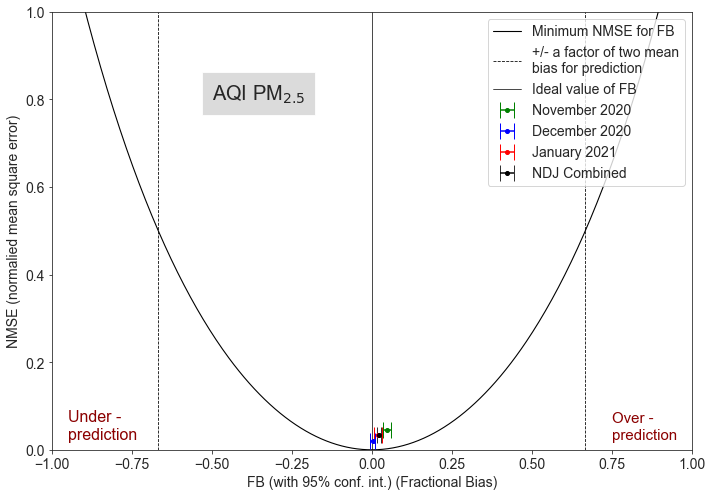

In [40]:
# PM2.5

x_coords = np.linspace(-1.99999,1.99999,1000)
y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
ylim = 1
yval = [val for val in range(0,ylim+1)]

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.0472, 0.0441, xerr = error_25nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.0023, 0.0206, xerr = error_25dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.0204, 0.0341, xerr = error_25jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.0231, 0.0329, xerr = error_25,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)
    
#text
ax.text(-0.5, 0.8, 'AQI PM$_{2.5}$', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

ax.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
ax.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

ax.set_ylim(0,ylim)
ax.set_xlim(-1,1)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.legend()
plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
fig.tight_layout()
plt.savefig('./images/extra/bstrap_pm25.pdf', dpi=300)

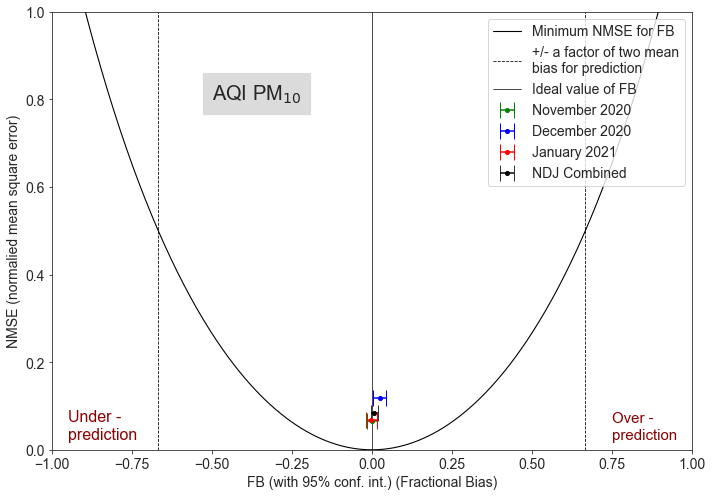

In [41]:
# PM10

x_coords = np.linspace(-1.99999,1.99999,1000)
y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
ylim = 1
yval = [val for val in range(0,ylim+1)]

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.00139, 0.0666, xerr = error_10nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.0243, 0.1183, xerr = error_10dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(-0.00205, 0.0681, xerr = error_10jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.0081, 0.085, xerr = error_10,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
ax.text(-0.5, 0.8, 'AQI PM$_{10}$', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

ax.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
ax.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

ax.set_ylim(0,ylim)
ax.set_xlim(-1,1)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.legend()
plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
fig.tight_layout()
plt.savefig('./images/extra/bstrap_pm10.pdf', dpi=300)